## Autism Spectrum Disorder Detection using Deep Learning and Machine Learning Models
### - Maddukuri Mohan Bullabbai(18BCE1217)
### - Dishanth G(18BCE1090)

### Autistic Spectrum Disorder analysis on adult data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

### Reading Data

In [2]:
dataset = pd.read_csv('csv_result-Autism-Adult-Data.csv')

dataset.head(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               704 non-null    int64 
 1   A1_Score         704 non-null    int64 
 2   A2_Score         704 non-null    int64 
 3   A3_Score         704 non-null    int64 
 4   A4_Score         704 non-null    int64 
 5   A5_Score         704 non-null    int64 
 6   A6_Score         704 non-null    int64 
 7   A7_Score         704 non-null    int64 
 8   A8_Score         704 non-null    int64 
 9   A9_Score         704 non-null    int64 
 10  A10_Score        704 non-null    int64 
 11  age              704 non-null    object
 12  gender           704 non-null    object
 13  ethnicity        704 non-null    object
 14  jundice          704 non-null    object
 15  austim           704 non-null    object
 16  contry_of_res    704 non-null    object
 17  used_app_before  704 non-null    ob

### Column Description:

##### Age - Years
##### Gender - Male or Female
##### Ethnicity - List of common ethnicities 
##### Born with jaundice	 -   Boolean  (yes or no)
##### Family member with PDD-	 Boolean  (yes or no)
##### Who is completing the test	-String: Parent, self, caregiver, medical staff, clinician ,etc.
##### Country of residence 	-String
##### Used the screening app before 	- Boolean  (yes or no)
##### Screening Method Type 	- Integer (0,1,2,3) (0=toddler, 1=child, 2= adolescent, 3= adult)
##### Question 1 Answer 	- Binary (0, 1)
##### Question 2 Answer 	- Binary (0, 1)
##### Question 3 Answer 	- Binary (0, 1)
##### Question 4 Answer 	- Binary (0, 1)
##### Question 5 Answer 	- Binary (0, 1)
##### Question 6 Answer 	- Binary (0, 1)
##### Question 7 Answer 	- Binary (0, 1)
##### Question 8 Answer 	- Binary (0, 1)
##### Question 9 Answer 	- Binary (0, 1)
##### Question 10 Answer 	- Binary (0, 1)
##### Screening Score 	- Integer 

### Dropping columns 'id' and 'age_desc' ,since it is not helpful for prediction

In [4]:
dataset=dataset.drop(['id','age_desc'],axis=1)
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,?,NO


### Checking for Null values

In [5]:
dataset.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

### But there are some unknown values stored as '?', so replacing '?' with nan so that we can impute easily

In [6]:
dataset = dataset.replace('?', np.nan)

In [7]:
dataset.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,NaN,no,no,Egypt,no,2,NaN,NO


In [8]:
dataset.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
relation           95
Class/ASD           0
dtype: int64

### Imputing null values of age with Mean

In [9]:
dataset['age'] = pd.to_numeric(dataset['age'], errors='coerce')

In [10]:
avg = round((dataset['age'].mean()))
avg = float(avg)
dataset['age'].fillna(avg, inplace=True)

### Checking null values after imputing

In [11]:
dataset['age'].isnull().sum()

0

### Imputing null values of ethnicity and relation with appropriate values

In [12]:
dataset['ethnicity'].fillna("Others", inplace=True)
dataset['relation'].fillna("Not Mentioned", inplace=True)

In [13]:
dataset.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:>

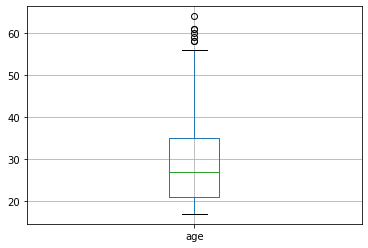

In [14]:
dataset['age'].plot.box(grid='True')

<AxesSubplot:>

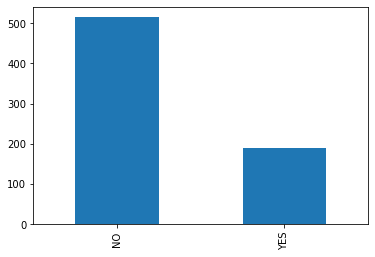

In [15]:
dataset['Class/ASD'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='contry_of_res'>

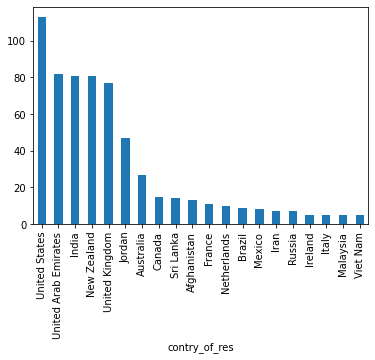

In [16]:
gk = dataset.groupby('contry_of_res').count()
gk = gk.nlargest(20,'Class/ASD')
gk['Class/ASD'].plot(kind='bar')

<AxesSubplot:>

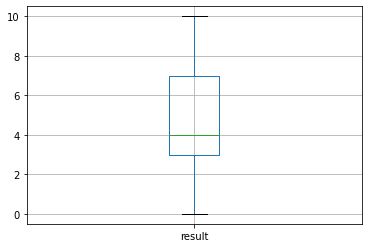

In [17]:
dataset['result'].plot.box(grid='True')

<AxesSubplot:>

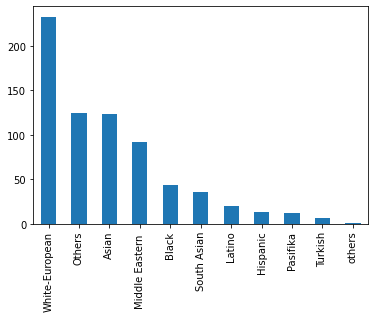

In [18]:
dataset['ethnicity'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='ethnicity'>

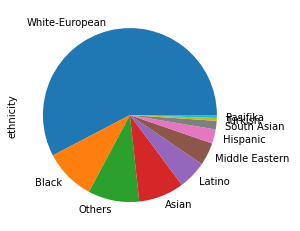

In [19]:
df1 = dataset[dataset['Class/ASD']=='YES']
df1['ethnicity'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

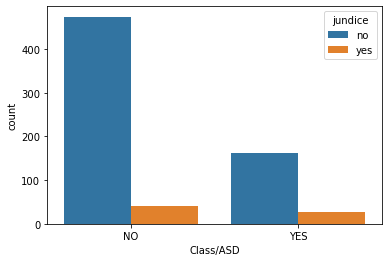

In [20]:
import seaborn as sns
sns.countplot(x="Class/ASD",hue="jundice", data=dataset)

<AxesSubplot:xlabel='austim', ylabel='count'>

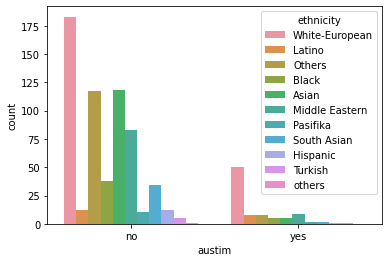

In [21]:
import seaborn as sns
sns.countplot(x="austim",hue="ethnicity", data=dataset)

#### Some of the key findings from Exploratory Data Analysis:
- Majority of the people who took the survey were from USA followed by UK,India,New Zealand,UAE and so on.
- Majority of the people who took the test are White-European ethnicity followed by Asian,Middle Eastern,black and so on.
- Person born without jaundice has high chance of being ASD positive and ASD is more common among male than female irrespective of being born with jaundice.
- Most of the white European people have ASD, followed by black, asian and so on.
- White and Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes from their family. we can say confident that there is a genetic link for ASD positive.


### Encoding categorical variables to make it suitable for prediction 

In [22]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
dataset['gender'] = le1.fit_transform(dataset['gender'])
dataset['jundice'] = le1.fit_transform(dataset['jundice'])
dataset['ethnicity'] = le1.fit_transform(dataset['ethnicity'])
dataset['austim'] = le1.fit_transform(dataset['austim'])
dataset['contry_of_res'] = le1.fit_transform(dataset['contry_of_res'])
dataset['used_app_before'] = le1.fit_transform(dataset['used_app_before'])
dataset['relation'] = le1.fit_transform(dataset['relation'])
dataset['Class/ASD'] = le1.fit_transform(dataset['Class/ASD'])

In [23]:
dataset.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6,5,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5,5,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8,3,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6,5,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,5,0,0,22,0,2,1,0


In [24]:
dataset.reset_index(drop=True,inplace=True)
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6,5,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5,5,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8,3,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6,5,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,5,0,0,22,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,9,0,0,51,0,7,5,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,2,0,0,40,0,3,3,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,5,0,0,51,0,7,1,1
702,1,0,0,1,1,0,1,0,1,1,35.0,1,7,0,0,47,0,6,5,0


### X-Indepenent Variables
### y-Target Variable

In [25]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [26]:
len(X)

704

### Splitting data into train and test data for training the model and testing the model

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## KNN classification 

### Scaling the data 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Data

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting the values based on training data

In [30]:
y_pred = classifier.predict(X_test)

### Performance metrics 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[94  2]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        96
           1       0.96      0.98      0.97        45

    accuracy                           0.98       141
   macro avg       0.97      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141



### Accuracy by comparing the results of predicted values and original test values

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [33]:
acc

0.9787234042553191

## Support Vector Machines (SVM) classification

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Scaling the Data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Data

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

### Predicting the values based on training data

In [37]:
y_pred = svclassifier.predict(X_test)

### Performance metrics

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[110   0]
 [  0  31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        31

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



### Accuracy by comparing the results of predicted values and original test values

In [39]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [40]:
acc

1.0

## Random forests classification

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Scaling the Data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Data

In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

### Predicting the values based on training data

In [44]:
y_pred = regressor.predict(X_test)

### Performance metrics

In [45]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### Accuracy by comparing the results of predicted values and original test values

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [47]:
acc

1.0

## Deep Learning Model

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
ann = tf.keras.models.Sequential()

In [51]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [52]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [53]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [54]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
ann.fit(X_train, y_train, batch_size = 10, epochs = 50)

Train on 563 samples
Epoch 1/50
563/563 [==============================] - 1s 1ms/sample - loss: 0.6976 - accuracy: 0.7300
Epoch 2/50
563/563 [==============================] - 0s 199us/sample - loss: 0.5836 - accuracy: 0.7478
Epoch 3/50
563/563 [==============================] - 0s 142us/sample - loss: 0.4869 - accuracy: 0.8046
Epoch 4/50
563/563 [==============================] - 0s 99us/sample - loss: 0.4012 - accuracy: 0.8792
Epoch 5/50
563/563 [==============================] - 0s 121us/sample - loss: 0.3283 - accuracy: 0.9147
Epoch 6/50
563/563 [==============================] - 0s 129us/sample - loss: 0.2687 - accuracy: 0.9378
Epoch 7/50
563/563 [==============================] - 0s 154us/sample - loss: 0.2247 - accuracy: 0.9432
Epoch 8/50
563/563 [==============================] - 0s 182us/sample - loss: 0.1907 - accuracy: 0.9414
Epoch 9/50
563/563 [==============================] - 0s 163us/sample - loss: 0.1642 - accuracy: 0.9485
Epoch 10/50
563/563 [=========================

In [56]:
y_pred = ann.predict(X_test) #gives the probability in decimals
y_pred = (y_pred > 0.5) #to make it 0 or 1 where 0 means the customer wont leave


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[97  0]
 [ 1 43]]


0.9929078014184397

## PCA 

In [58]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.decomposition import PCA
# Find the 2 most important features(independent variable from the dataset)
#Start with 2 and then increase if there is poor result
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = classifier.predict(X_test)


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102   1]
 [  0  38]]


0.9929078014184397

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


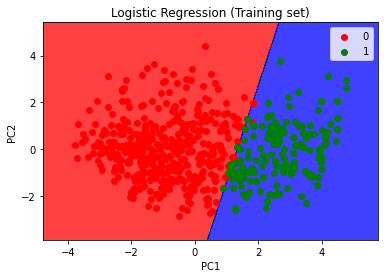

In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


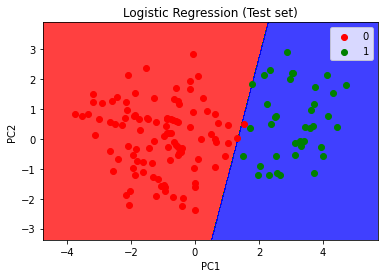

In [66]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()